In [23]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Webscraping to Extract Tesla Revenue Data

In [46]:
import bs4 as BeautifulSoup
import requests
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url).text
soup = BeautifulSoup.BeautifulSoup(response, "html.parser")
tables = soup.find_all('table')
data = []

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all('tr')
        for row in rows[1:]:
            cols = row.find_all('td')
            if len(cols) >= 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                data.append({'Date': date, 'Revenue': revenue})
        break

tesla_data = pd.DataFrame(data)
tesla_data['Revenue'] = tesla_data['Revenue'].str.replace(',|\\$', "", regex=True)
tesla_data.dropna(inplace=True)
tesla_data = tesla_data[tesla_data['Revenue'] != ""]
print(tesla_data.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


# Use yfinance to Extract Stock Data

In [47]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


 # Webscraping to Extract GME Revenue Data

In [65]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Game Stop Data

In [69]:
import requests
import pandas as pd
import bs4 as BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url).text
soup = BeautifulSoup.BeautifulSoup(response, "html.parser")
tables = soup.find_all('table')

data = []
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        rows = table.find_all('tr')
        for row in rows[1:]:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                data.append({'Date': date, 'Revenue': revenue})
        break

gme_revenue = pd.DataFrame(data)
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


# Tesla's stock graph

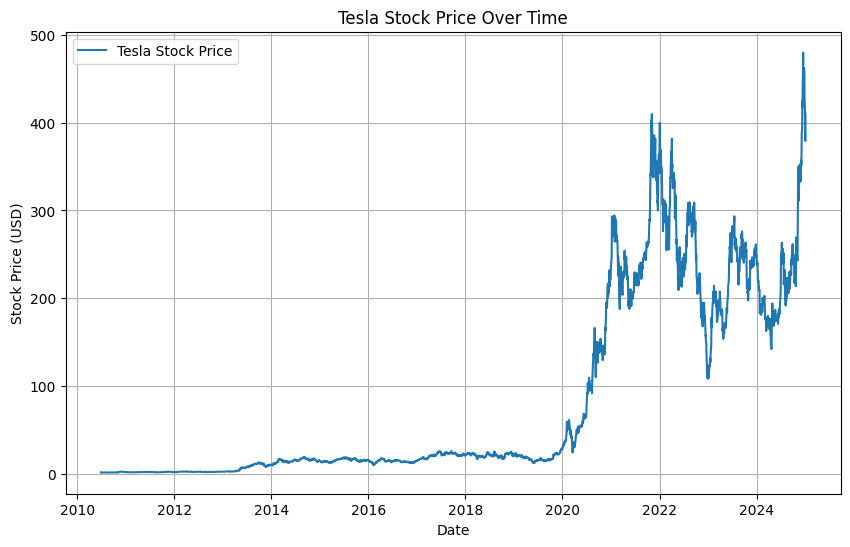

In [70]:
import yfinance as yf
import matplotlib.pyplot as plt
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

# GameStop's (GME) stock graph

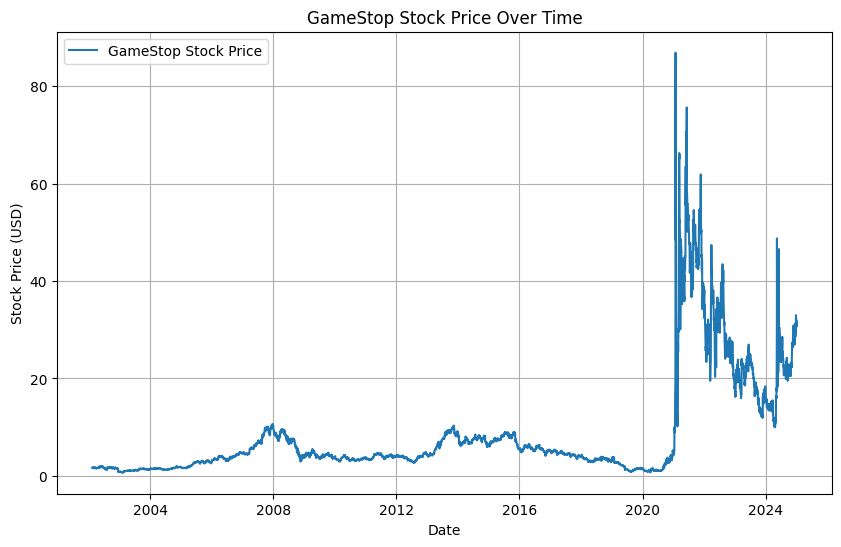

In [71]:
import matplotlib.pyplot as plt
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
plt.figure(figsize=(10,6))
plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Price')
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.legend()
plt.show()